In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download jessicali9530/celeba-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
100% 1.33G/1.33G [01:00<00:00, 23.7MB/s]
100% 1.33G/1.33G [01:01<00:00, 23.4MB/s]


In [ ]:
!unzip celeba-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/img_align_celeba/197604.jpg  
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/19

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !rm -r drive/MyDrive/cgan2/learning_images/*

In [ ]:
# !rm -r drive/MyDrive/cgan2/model_checkpoints/*

# Config

In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
img_size = 96
ds_size = 75000
batch_size = 128
latent_size = 128

img_dir = "img_align_celeba/img_align_celeba/"

attributes = sorted(['Attractive', 'Bald', 'Bangs', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Chubby',
                     'Double_Chin', 'Eyeglasses', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male',
                     'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Receding_Hairline', 'Smiling',
                     'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Necklace',
                     'Young'])

len_attributes = len(attributes)

# Setting up the Database

In [ ]:
import pandas as pd

df = pd.read_csv("list_attr_celeba.csv")

In [ ]:
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
df.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [ ]:
df.drop(['5_o_Clock_Shadow', 'Bags_Under_Eyes', 'Blurry', 'Bushy_Eyebrows', 'Goatee', 'Pointy_Nose', 'Pale_Skin', 'Sideburns', 'Wearing_Lipstick','Mouth_Slightly_Open', 'Arched_Eyebrows', 'Big_Lips', 'Big_Nose', 'Rosy_Cheeks', 'Wearing_Necktie'], axis=1, inplace=True)

In [ ]:
df.shape

(202599, 26)

In [ ]:
df.columns

Index(['image_id', 'Attractive', 'Bald', 'Bangs', 'Black_Hair', 'Blond_Hair',
       'Brown_Hair', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mustache', 'Narrow_Eyes',
       'No_Beard', 'Oval_Face', 'Receding_Hairline', 'Smiling',
       'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat',
       'Wearing_Necklace', 'Young'],
      dtype='object')

In [ ]:
df = df.sample(frac=1).head(ds_size)

In [ ]:
def process_image(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [img_size, img_size])
    img = img / 255
    return img

In [ ]:
len(attributes)

25

In [ ]:
# def data_generator(df):
#     # Yield each processed row as an (image, labels) tuple
#     for _, row in df.iterrows():
#         img = process_image(img_dir + row['image_id'])
#         labels = [1 if row[attr] == 1 else 0 for attr in attributes]
#         yield {"image": img, "labels": labels}

In [ ]:
# import tensorflow as tf

# ds = tf.data.Dataset.from_generator(
#     lambda: data_generator(df),
#     output_signature={
#         "image": tf.TensorSpec(shape=(96, 96, 3), dtype=tf.float32),
#         "labels": tf.TensorSpec(shape=(len(attributes),), dtype=tf.int32),
#     }
# )

In [ ]:
def data_generator(df):
    # Yield only minimal metadata
    for _, row in df.iterrows():
        yield {"image_id": row['image_id'], "labels": [1 if row[attr] == 1 else 0 for attr in attributes]}

# Function to load and process images outside the generator
def load_and_process(data):
    img = process_image(img_dir + data["image_id"])  # Load and process the image
    return {"image": img, "labels": data["labels"]}

# Create the dataset from the generator
ds = tf.data.Dataset.from_generator(
    lambda: data_generator(df),
    output_signature={
        "image_id": tf.TensorSpec(shape=(), dtype=tf.string),
        "labels": tf.TensorSpec(shape=(len(attributes),), dtype=tf.int32),
    }
)

# Map the processing function with parallel calls
ds = ds.map(load_and_process, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
ds = ds.cache()
ds = ds.shuffle(100000)
ds = ds.batch(batch_size) #batch size will be 64
ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)  # Prefetch to improve performance

each row in our dataset has an image and a label.

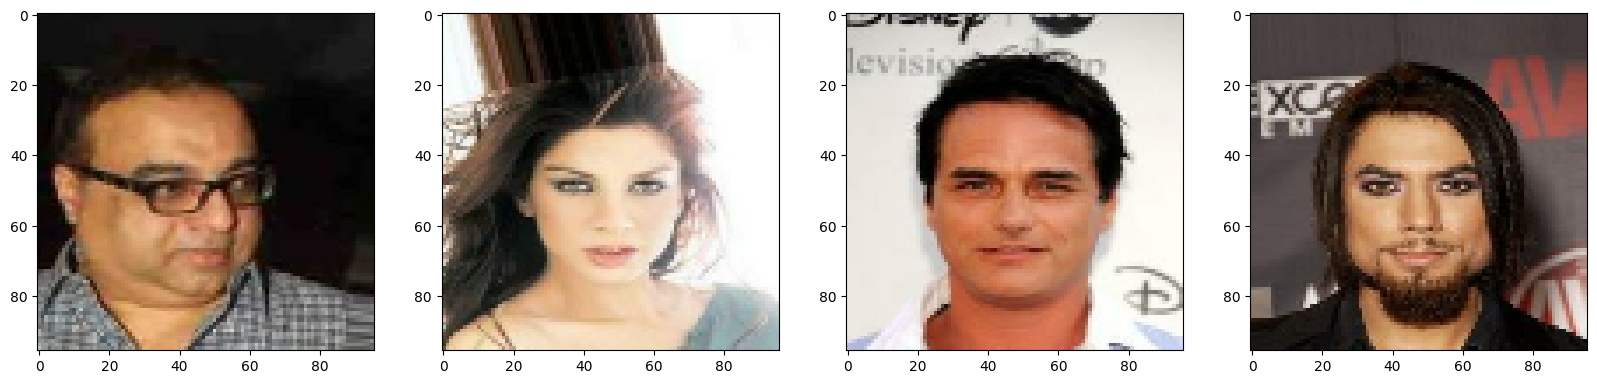

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

iter = ds.as_numpy_iterator()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample = iter.next()
    ax[idx].imshow(np.squeeze(sample['image'])) # squeeze is used to change the shaped from (28, 28, 1) -> (28, 28)

In [ ]:
row = ds.as_numpy_iterator().next()

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [ ]:
row['labels']

In [ ]:
row['image'].shape

There are 128 images of 96x96 dimensions and 3 channels

# Building the Model

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D, Input, Embedding, Concatenate
from tensorflow.keras.models import load_model

In [ ]:
def build_generator():
    noise_input = Input(shape=(latent_size,))
    label_input = Input(shape=(len_attributes,))

    label_embedding = Dense(12 * 12)(label_input)
    label_embedding = Reshape((12, 12, 1))(label_embedding)

    # Upscaling label channels to have an equal influence in training
    label_embedding = Conv2D(128, kernel_size=1, padding='same')(label_embedding)  # Now shape (7, 7, 128)

    # Process noise and reshape
    noise_dense = Dense(12 * 12 * 128)(noise_input)
    noise_reshape = Reshape((12, 12, 128))(noise_dense)

    # Concatenate along the channels
    combined = Concatenate()([noise_reshape, label_embedding])  # Resulting shape (7, 7, 256)

    # Generator layers
    x = UpSampling2D()(combined)
    x = Conv2D(128, 5, padding='same')(x)
    x = LeakyReLU(0.2)(x)

    x = UpSampling2D()(x)
    x = Conv2D(128, 5, padding='same')(x)
    x = LeakyReLU(0.2)(x)

    x = UpSampling2D()(x)
    x = Conv2D(128, 5, padding='same')(x)
    x = LeakyReLU(0.2)(x)

    x = Conv2D(64, 4, padding='same')(x)
    x = LeakyReLU(0.2)(x)

    x = Conv2D(3, 4, padding='same')(x)
    x = LeakyReLU(0.2)(x)

    # Final Conv2D layer to output a single channel (grayscale image)
    output = Conv2D(3, 4, padding='same', activation='sigmoid')(x)

    return Model([noise_input, label_input], output)


In [ ]:
# generator = build_generator()
generator = load_model('drive/MyDrive/cgan2/model_checkpoints/generator_epoch_110.keras')
generator.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 25)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer (InputLayer)  │ (None, 128)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 144)            │          3,744 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 18432)          │      2,377,728 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 12, 12, 1)      │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 12, 12, 128)    │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 12, 12, 128)    │            256 │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 12, 12, 256)    │              0 │ reshape_1[0][0],       │
│                           │                        │                │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 24, 24, 256)    │              0 │ concatenate[0][0]      │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 24, 24, 128)    │        819,328 │ up_sampling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu (LeakyReLU)   │ (None, 24, 24, 128)    │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_1           │ (None, 48, 48, 128)    │              0 │ leaky_re_lu[0][0]      │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 48, 48, 128)    │        409,728 │ up_sampling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_1 (LeakyReLU) │ (None, 48, 48, 128)    │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_2           │ (None, 96, 96, 128)    │              0 │ leaky_re_lu_1[0][0]    │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 96, 96, 128)    │        409,728 │ up_sampling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_2 (LeakyReLU) │ (None, 96, 96, 128)    │              0 │ conv2d_3[0][0]         │
├──────────────────────

 Total params: 4,154,870 (15.85 MB)

 Trainable params: 4,154,870 (15.85 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
num_images = 4

# Generate random noise
random_noise = np.random.randn(num_images, latent_size)

# Generate random labels for CelebA (0 or 1 for each of 25 attributes)
random_labels = np.random.randint(0, 2, (num_images, len_attributes))

# Convert labels to tensor format
labels_tensor = tf.convert_to_tensor(random_labels, dtype=tf.int32)

# Generate images with the generator model
generated_images = generator.predict([random_noise, labels_tensor])

# Display the generated images
fig, ax = plt.subplots(ncols=num_images, figsize=(20, 20))
for idx, img in enumerate(generated_images):
    ax[idx].imshow(np.squeeze(img), cmap='gray')
    # Display the multi-label vector
    ax[idx].title.set_text(f"Labels: {random_labels[idx].tolist()}")
    ax[idx].axis('off')  # Hide axes

plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Dense, Reshape, Concatenate, Conv2D, LeakyReLU, Dropout, Flatten
from tensorflow.keras.models import Model

def build_discriminator():
    # Image input
    image_input = Input(shape=(img_size, img_size, 3))

    # Label input and embedding
    label_input = Input(shape=(len_attributes,))
    label_embedding = Dense(img_size * img_size)(label_input)  # Expand to match image dimensions
    label_embedding = Reshape((img_size, img_size, 1))(label_embedding)  # Shape to (96, 96, 1)

    # Concatenate image and label embedding along the channel dimension
    combined_input = Concatenate()([image_input, label_embedding])  # Resulting shape: (96, 96, 4)

    # Convolutional layers for the discriminator
    x = Conv2D(32, kernel_size=4, strides=1, padding="same")(combined_input)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.4)(x)

    x = Conv2D(64, kernel_size=5, strides=2, padding="same")(x)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.4)(x)

    x = Conv2D(128, kernel_size=5, strides=2, padding="same")(x)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.4)(x)

    x = Conv2D(256, kernel_size=5, strides=2, padding="same")(x)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.4)(x)

    # Flatten and output layer
    x = Flatten()(x)
    output = Dense(1, activation='sigmoid')(x)

    return Model([image_input, label_input], output)

In [ ]:
# discriminator = build_discriminator()
discriminator = load_model('drive/MyDrive/cgan2/model_checkpoints/discriminator_epoch_120.keras')
discriminator.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 25)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 9216)           │        239,616 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 96, 96, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 96, 96, 1)      │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 96, 96, 4)      │              0 │ input_layer_2[0][0],   │
│ (Concatenate)             │                        │                │ reshape_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 96, 96, 32)     │          2,080 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_5 (LeakyReLU) │ (None, 96, 96, 32)     │              0 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 96, 96, 32)     │              0 │ leaky_re_lu_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 48, 48, 64)     │         51,264 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_6 (LeakyReLU) │ (None, 48, 48, 64)     │              0 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 48, 48, 64)     │              0 │ leaky_re_lu_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 24, 24, 128)    │        204,928 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_7 (LeakyReLU) │ (None, 24, 24, 128)    │              0 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 24, 24, 128)    │              0 │ leaky_re_lu_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 12, 12, 256)    │        819,456 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_8 (LeakyReLU) │ (None, 12, 12, 256)    │              0 │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 12, 12, 256)    │              0 │ leaky_re_lu_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 36864)          │              0 │ dropout_3[0][0]        │
├──────────────────────

 Total params: 1,354,209 (5.17 MB)

 Trainable params: 1,354,209 (5.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
discriminator.predict([generated_images, labels_tensor])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


array([[0.50932455],
       [0.5085233 ],
       [0.50879997],
       [0.5086217 ]], dtype=float32)

## Setting Up Training Loop

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
g_opt = Adam(learning_rate=0.0005)
d_opt = Adam(learning_rate=0.00001) # we want discriminator to learn slower than the generator so that we doesn't classify every image as 1 initially
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [ ]:
class ConditionalGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        super().compile(*args, **kwargs)
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        # Extract the real images and labels from the batch dictionary
        real_images = batch['image']
        labels = batch['labels']

        # Generate fake images
        random_latent_vectors = tf.random.normal((batch_size, latent_size))  # Noise vector
        generated_images = self.generator([random_latent_vectors, labels], training=True)

        # Combine real and fake images
        combined_images = tf.concat([real_images, generated_images], axis=0)
        combined_labels = tf.concat([labels, labels], axis=0)

        # Create labels for real and fake images
        real_fake_labels = tf.concat([tf.zeros((batch_size, 1)), tf.ones((batch_size, 1))], axis=0)

        # Add noise to the true outputs (labels) for real and fake images
        noise_real = 0.15 * tf.random.uniform(tf.shape(real_fake_labels[:batch_size]))
        noise_fake = -0.15 * tf.random.uniform(tf.shape(real_fake_labels[batch_size:]))
        real_fake_labels += tf.concat([noise_real, noise_fake], axis=0)

        # Train discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator([combined_images, combined_labels], training=True)
            d_loss = self.d_loss(real_fake_labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(grads, self.discriminator.trainable_variables))

        # Train generator
        misleading_labels = tf.zeros((batch_size, 1))  # Labels are all zeros for the generator
        with tf.GradientTape() as tape:
            generated_images = self.generator([random_latent_vectors, labels], training=True)
            predictions = self.discriminator([generated_images, labels], training=False)
            g_loss = self.g_loss(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(grads, self.generator.trainable_variables))

        return {"d_loss": d_loss, "g_loss": g_loss}

In this case, because we're using ds.batch(128), the batch passed to train_step will not be an array of dictionaries. Instead, it will be a dictionary itself containing the batched images and labels. Each of the dictionary's keys (e.g., 'image', 'label') will now hold a tensor of shape (batch_size, height, width, channels) or (batch_size, num_classes) depending on the type of data.

**Data format after batching**

Your dataset is a tf.data.Dataset object that, after batching, will yield a single dictionary per batch. This dictionary contains:

- 'image': a tensor of shape (batch_size, 28, 28, 1) representing a batch of images
- 'label': a tensor of shape (batch_size, 10) representing the one-hot encoded labels for each image in the batch

This is still a batch of data, but it's not an array of dictionaries; it's a single dictionary containing batched tensors.

In [ ]:
model = ConditionalGAN(generator, discriminator)

model.compile(g_opt, d_opt, g_loss, d_loss)

## Setting Up Callbacks

In [ ]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import array_to_img

class ModelMonitor(Callback):
    def __init__(self, num_img=3, save_dir="images"):
        self.num_img = num_img
        self.latent_dim = latent_size
        self.save_dir = save_dir

    def on_epoch_end(self, epoch, logs=None):
        if (epoch+1)%5!=0:
          return
        # Generate random latent vectors
        random_latent_vectors = tf.random.normal((self.num_img, self.latent_dim))  # Shape: (num_img, latent_dim)

        # Generate random binary labels for 25 attributes
        random_labels = tf.random.uniform((self.num_img, 25), minval=0, maxval=2, dtype=tf.int32)  # Shape: (num_img, 25)

        # Generate images using the generator
        generated_images = self.model.generator([random_latent_vectors, random_labels], training=False)

        # Scale the generated images to the range [0, 255] and convert to uint8
        generated_images = (generated_images * 255).numpy().astype(np.uint8)

        # Save the generated images
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join(self.save_dir, f'generated_img_{epoch+1}_{i}.png'))

In [ ]:
import os
from tensorflow.keras.callbacks import Callback

class ModelCheckpoint(Callback):
    def __init__(self, save_dir='saved_models'):
        super().__init__()
        self.save_dir = save_dir
        # Ensure the save directory exists
        os.makedirs(self.save_dir, exist_ok=True)

    def on_epoch_end(self, epoch, logs=None):
        if (epoch+1)%10!=0:
          return

        # Define file paths for generator and discriminator
        generator_path = os.path.join(self.save_dir, f'generator_epoch_{epoch + 1}.keras')
        discriminator_path = os.path.join(self.save_dir, f'discriminator_epoch_{epoch + 1}.keras')

        # Save the generator and discriminator models
        self.model.generator.save(generator_path)
        self.model.discriminator.save(discriminator_path)

        print(f"Models saved for epoch {epoch + 1}:")
        print(f"  Generator saved at {generator_path}")
        print(f"  Discriminator saved at {discriminator_path}")

## Training the Model

In [ ]:
# steps_per_epoch = len(df) // batch_size

# hist = model.fit(ds, epochs=5, steps_per_epoch=steps_per_epoch, callbacks=[ModelMonitor(num_img=3, latent_dim=256), ModelCheckpoint(save_dir='my_model_checkpoints')])

In [ ]:
hist = model.fit(ds, epochs=500, initial_epoch=132, steps_per_epoch=50, callbacks=[ModelMonitor(num_img=3, save_dir='drive/MyDrive/cgan2/learning_images'), ModelCheckpoint(save_dir='drive/MyDrive/cgan2/model_checkpoints')])

Epoch 133/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - d_loss: 0.6988 - g_loss: 0.5775
Epoch 134/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - d_loss: 0.7080 - g_loss: 0.6000
Epoch 135/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - d_loss: 0.7084 - g_loss: 0.6240
Epoch 136/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - d_loss: 0.6406 - g_loss: 0.7749
Epoch 137/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - d_loss: 0.4959 - g_loss: 0.9168
Epoch 138/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - d_loss: 0.2994 - g_loss: 0.6098
Epoch 139/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - d_loss: 0.5927 - g_loss: 1.1704
Epoch 140/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - d_loss: 0.3038 - g_loss: 1.6683Models saved for epoch 140:
  Generator saved at drive/MyDrive/cgan2/model_checkpoints/generator_epoch_140.keras
  Discriminator saved at drive/MyDrive/cgan2/model_checkpoints/discriminator_epoch_140.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - d_loss: 0.3032 - g_loss: 1.6675
Epoch 141/500
50/50 ━━━━━━━

In [ ]:
generator.load_weights(os.path.join('archive', 'generatormodel.h5'))

In [ ]:
num_images = 12
noise_dim = 128

# Random noise and labels
random_noise = np.random.randn(num_images, noise_dim)
random_labels = np.random.randint(0, 10, num_images)

# One-hot encode the labels
labels_ohe = tf.one_hot(random_labels, 10)

generated_images = generator.predict([random_noise, labels_ohe])

fig, ax = plt.subplots(ncols=num_images, figsize=(20, 20))
for idx, img in enumerate(generated_images):
    ax[idx].imshow(np.squeeze(img), cmap='gray')
    label_index = tf.argmax(labels_ohe[idx]).numpy()
    ax[idx].title.set_text(f"Label: {label_index}")
    ax[idx].axis('off')

plt.show()

**Stable GAN Training**

1. **Pooling Replacements**: Replacing pooling with strided convolutions in the discriminator and fractional-strided convolutions in the generator is standard in DCGANs to ensure learnable downsampling and upsampling, which improves the quality of generated images.

2. **Batch Normalization**: Applying batch normalization in both the generator and discriminator helps stabilize the learning process by normalizing activations, though it might be worth experimenting with layer normalization or other normalization types for more complex architectures.

3. **Removing Fully Connected Layers**: Deep GANs benefit from removing fully connected layers in the discriminator as they often introduce unnecessary complexity, focusing instead on convolutional layers to capture spatial hierarchies.

4. **ReLU/Tanh for Generator**: Using ReLU in all layers of the generator except the output, which should use Tanh, helps maintain stability and prevents activations from saturating too early.

5. **LeakyReLU for Discriminator**: LeakyReLU activation in the discriminator helps prevent the "dying ReLU" problem, maintaining a small gradient when the activation is negative.

6. **Normalization to [-1, 1]**: Normalize inputs to \([-1, 1]\) and use Tanh at the output of the generator to ensure the generated data is in a comparable range, which is particularly effective with images.

7. **Flipping Labels**: Flipping labels (label smoothing) when training the generator helps prevent the discriminator from becoming too confident, which can lead to instability.

8. **Random Gaussian Inputs for Generator**: Sampling Gaussian random numbers as input to the generator works as latent noise, ensuring diverse outputs.

9. **Mini Batches of All Real or All Fake**: For batch norm, using batches that contain only real or only fake data provides more stable statistics, as the variance across real and fake distributions can be high.

10. **Average Pooling for Downsampling**: Average pooling, combined with strides in the discriminator, can avoid the checkerboard artifacts that occur with some GANs, ensuring smoother downsampling.

11. **ConvTranspose2D for Upsampling**: Using transposed convolutions (ConvTranspose2D) with strides for upsampling in the generator is preferred over nearest-neighbor or bilinear upsampling as it learns the upsampling process directly from data.

12. **Label Smoothing and Noise Injection**: Applying label smoothing and adding random noise to the labels in the discriminator introduces stochasticity, making it harder for the discriminator to become overconfident, which stabilizes training.

13. **Use DCGAN Architecture as a Baseline**: DCGANs provide a proven architecture for stable GAN training, so only deviate if your specific application requires it.

14. **Monitoring Discriminator Loss**: If the discriminator’s loss goes to 0.0, it has likely become too strong, effectively making training impossible as it would “see through” the generator. Balancing losses between generator and discriminator is crucial.

15. **Monitoring Generator Loss**: If the generator’s loss consistently decreases while producing low-quality images, this could indicate that it’s learning to exploit weaknesses in the discriminator by producing "garbage" images.

16. **Label Usage**: If you have labeled data (conditional GAN), using labels can guide the generator toward producing more meaningful images in supervised settings.

17. **Noise Injection and Decay**: Adding noise to discriminator inputs and gradually decaying it over time helps to prevent the discriminator from becoming too confident early in training, which can destabilize learning.

18. **Dropout**: Applying a high dropout rate (like 50%) can encourage diverse outputs by introducing randomness into the training process, though dropout is often used selectively in GANs to avoid disrupting image consistency.